In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [17]:
import pandas as pd

# Load the training data
df = pd.read_csv('Training.csv')

df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [19]:
# Check the shape and head
print("Shape of dataset:", df.shape)

Shape of dataset: (4920, 133)


In [21]:
# Summary of numerical values (if any)
print(df.describe())

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

In [23]:
# Count of each disease (label)
print(df['prognosis'].value_counts())

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

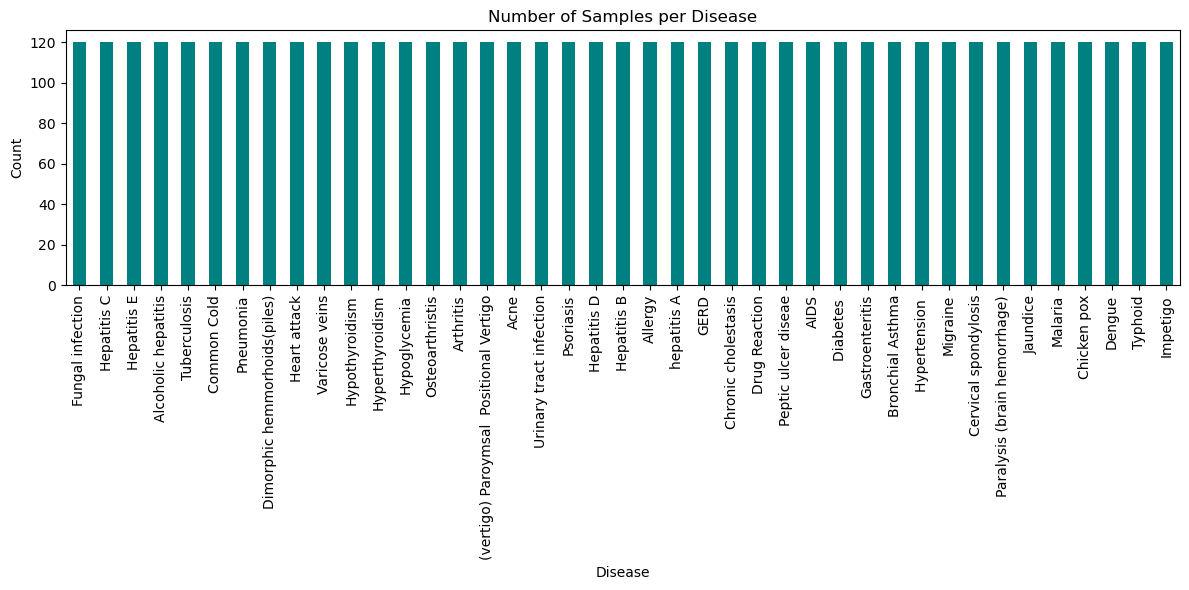

In [25]:
# Bar chart of disease counts
plt.figure(figsize=(12, 6))
df['prognosis'].value_counts().plot(kind='bar', color='teal')
plt.title('Number of Samples per Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
# All columns except 'prognosis' are symptoms
symptom_cols = df.columns[:-1]

In [29]:
# How many symptoms in total
print(f"Total symptoms: {len(symptom_cols)}")

Total symptoms: 132


In [31]:
# Count of symptoms present in dataset (i.e., how many times each symptom is '1')
symptom_presence = df[symptom_cols].sum().sort_values(ascending=False)

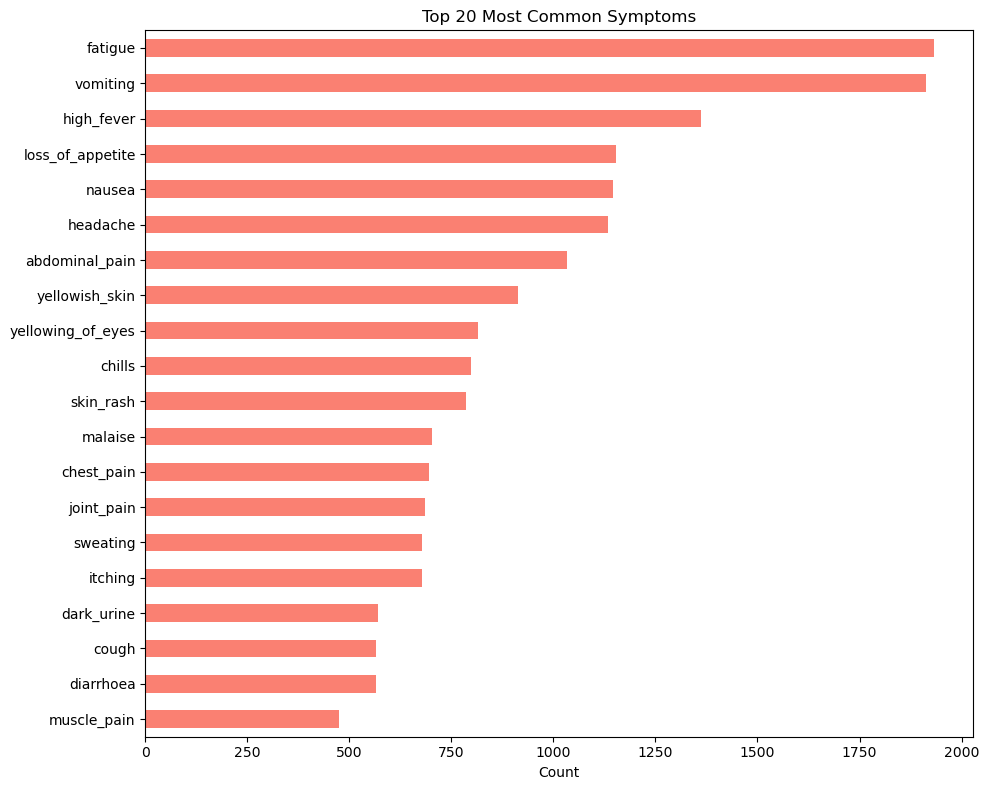

In [33]:
# Top 20 most common symptoms
symptom_presence[:20].plot(kind='barh', figsize=(10, 8), color='salmon')
plt.title("Top 20 Most Common Symptoms")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

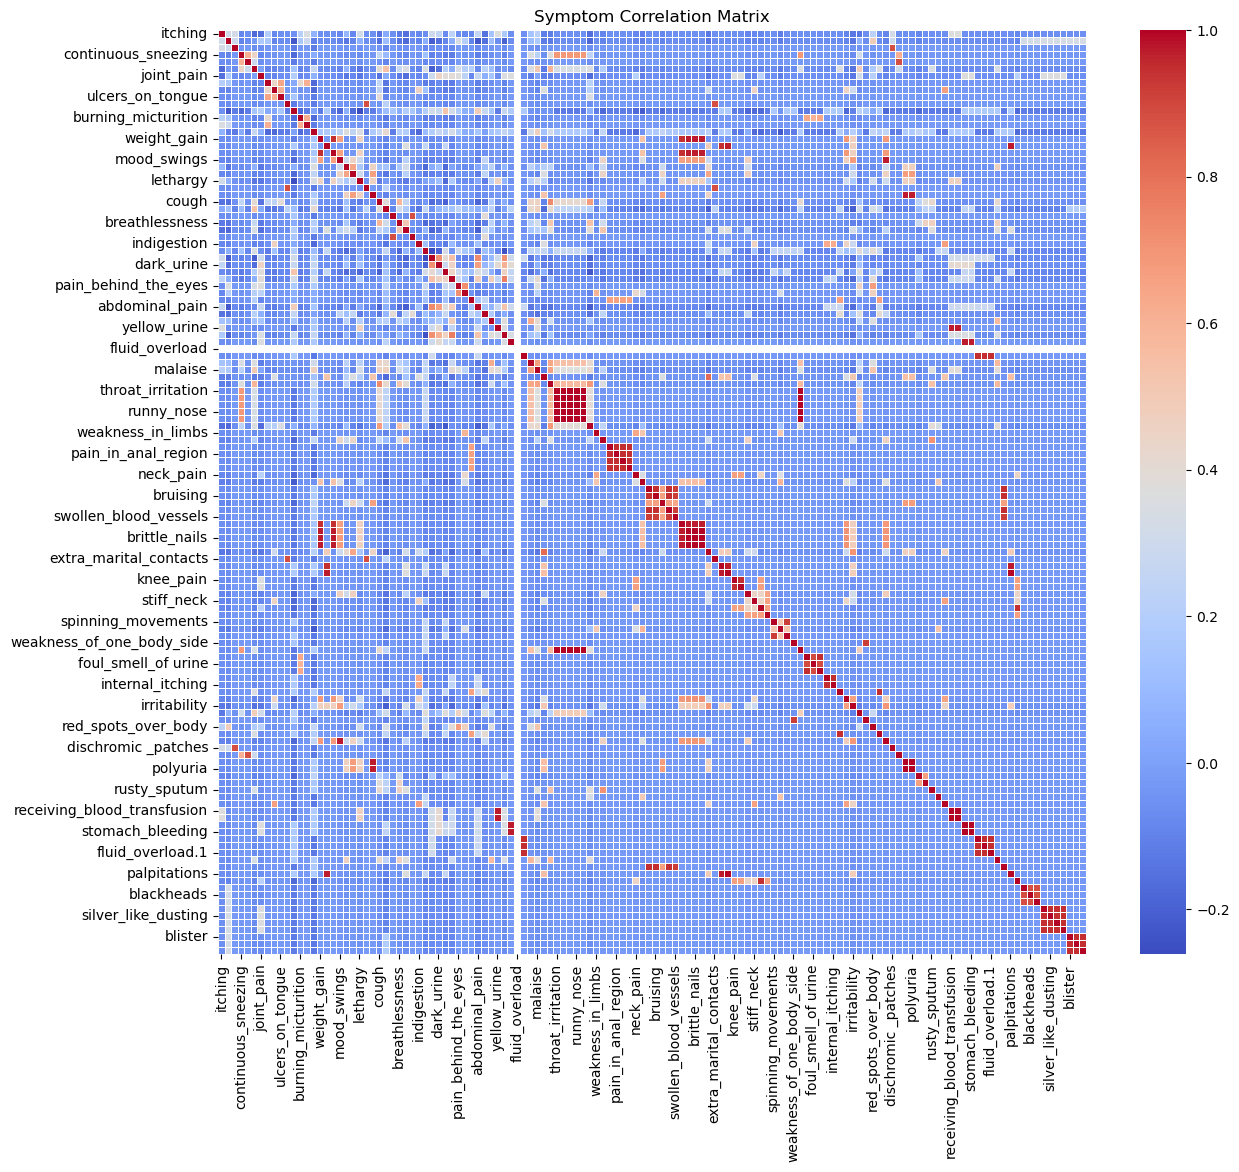

In [35]:
# Only if needed — can be slow
corr = df[symptom_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Symptom Correlation Matrix")
plt.show()

In [37]:
# Features and label
X = df.drop('prognosis', axis=1)
y = df['prognosis']

In [39]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [43]:
# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Predict
y_pred = model.predict(X_test)

In [47]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
             

In [55]:
import numpy as np

In [51]:
# Create a zeroed symptom input
sample = np.zeros((1, X.shape[1]))

In [53]:
# Set symptoms (e.g. 'itching', 'vomiting', 'fatigue')
symptoms = ['itching', 'vomiting', 'fatigue']
for s in symptoms:
    if s in X.columns:
        sample[0][X.columns.get_loc(s)] = 1

In [57]:
# Predict
predicted_class = model.predict(sample)[0]
predicted_disease = le.inverse_transform([predicted_class])[0]

print("Predicted Disease:", predicted_disease)

Predicted Disease: Jaundice


C:\Users\Royal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
from sklearn.preprocessing import LabelEncoder

In [61]:
# Load data again
df = pd.read_csv("Training.csv")

In [63]:
# Encode target variable (prognosis)
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

In [65]:
# Separate features and target
X = df.drop('prognosis', axis=1)
y = df['prognosis']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [71]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [73]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

Decision Tree Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0


In [77]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 1.0


In [79]:
# Sample manual input - list of 132 symptoms, 1 for present, 0 for not
sample_input = [0] * len(X.columns)
sample_input[X.columns.get_loc("fatigue")] = 1
sample_input[X.columns.get_loc("high_fever")] = 1
sample_input[X.columns.get_loc("headache")] = 1

In [81]:
# Predict with random forest
predicted_class = rf.predict([sample_input])[0]
predicted_disease = le.inverse_transform([predicted_class])[0]
print("Predicted Disease:", predicted_disease)

Predicted Disease: Bronchial Asthma


C:\Users\Royal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [83]:
import joblib

joblib.dump(rf, "disease_model.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [85]:
import pandas as pd
df = pd.read_csv("Training.csv")

print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("Number of unique diseases:", df['prognosis'].nunique())

Shape of dataset: (4920, 133)
Columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limb

In [87]:
df['total_symptoms'] = df.iloc[:, :-1].sum(axis=1)
print(df['total_symptoms'].describe())

count    4920.000000
mean        7.448780
std         3.592166
min         3.000000
25%         5.000000
50%         6.000000
75%        10.000000
max        17.000000
Name: total_symptoms, dtype: float64


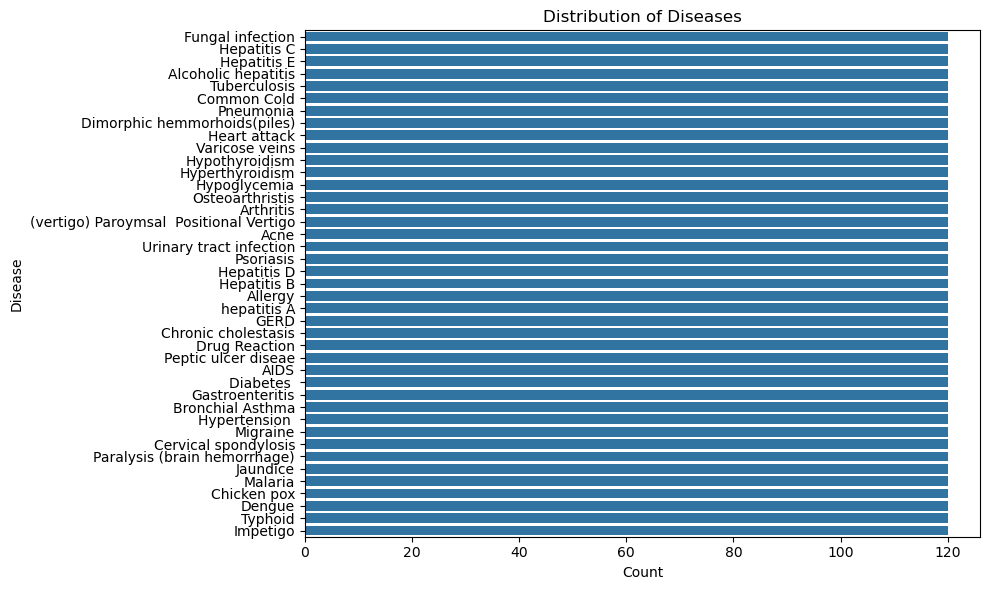

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='prognosis', data=df, order=df['prognosis'].value_counts().index)
plt.title("Distribution of Diseases")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("Training.csv")

# Split features and target
X = df.drop("prognosis", axis=1)
y = df["prognosis"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [95]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")

Naive Bayes Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000


In [97]:
# Train the final model
final_model = RandomForestClassifier()
final_model.fit(X, y_encoded)

RandomForestClassifier()

In [99]:
# Store label names
disease_labels = le.classes_

In [101]:
# Prediction function
def predict_disease(symptoms):
    input_data = [0] * len(X.columns)
    for symptom in symptoms:
        if symptom in X.columns:
            input_data[X.columns.get_loc(symptom)] = 1
    prediction = final_model.predict([input_data])[0]
    return disease_labels[prediction]

In [103]:
example = ['headache', 'vomiting', 'fatigue']
print("Predicted Disease:", predict_disease(example))

Predicted Disease: Paralysis (brain hemorrhage)


C:\Users\Royal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [113]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (prognosis)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [115]:
# Save the model and encoder
pickle.dump(model, open("final_model.pkl", "wb"))
pickle.dump(encoder, open("label_encoder.pkl", "wb"))
pickle.dump(list(X.columns), open("symptom_list.pkl", "wb"))

print("✅ Model, encoder, and symptom list saved successfully.")

✅ Model, encoder, and symptom list saved successfully.


In [117]:
import streamlit as st
import pickle
import numpy as np

# Load model and encoders
model = pickle.load(open("final_model.pkl", "rb"))
encoder = pickle.load(open("label_encoder.pkl", "rb"))
symptom_list = pickle.load(open("symptom_list.pkl", "rb"))

# App title
st.title("🩺 Disease Predictor App with Doctor Suggestion")
st.write("Enter symptoms to predict the disease and get recommendations.")

# Sidebar for user input
selected_symptoms = st.multiselect("Select your symptoms", symptom_list)

if st.button("Predict"):
    input_data = np.zeros(len(symptom_list))
    for symptom in selected_symptoms:
        input_data[symptom_list.index(symptom)] = 1

    prediction = model.predict([input_data])[0]
    disease = encoder.inverse_transform([prediction])[0]

    st.success(f"✅ Likely Disease: **{disease}**")

    # Doctor Recommendation Logic (simple)
    if disease.lower() in ["hepatitis", "heart attack", "pneumonia", "stroke"]:
        urgency = "🚨 High - See a specialist immediately!"
    elif disease.lower() in ["migraine", "diabetes", "hypertension"]:
        urgency = "⚠️ Medium - Book a doctor visit soon."
    else:
        urgency = "✅ Low - You may try rest or OTC medication first."

    st.markdown(f"**Urgency Level:** {urgency}")

    st.markdown("👨‍⚕️ **Recommended Doctor:**")
    st.markdown("- Cardiologist" if "heart" in disease.lower() else
                "- Neurologist" if "migraine" in disease.lower() else
                "- General Physician")



2025-07-20 19:16:54.970 
  command:

    streamlit run C:\Users\Royal\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


NameError: name 'symptom_list' is not defined